# Decision Trees

## The Data

We will be using the same dataset through our discussions on classification with tree-methods (Decision Tree,Random Forests, and Gradient Boosted Trees) in order to compare performance metrics across these related models.

We will work with the "Palmer Penguins" dataset, as it is simple enough to help us fully understand how changing hyperparameters can change classification results.


Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

Summary:
The data folder contains two CSV files. For intro courses/examples, you probably want to use the first one (penguins_size.csv).

* penguins_size.csv: Simplified data from original penguin data sets. Contains variables:

    * species: penguin species (Chinstrap, Adélie, or Gentoo)
    * bill_length_mm: bill length (mm)
    * bill_depth_mm: bill depth (mm)
    * flipper_length_mm: flipper length (mm)
    * body_mass_g: body mass (g)
    * island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    * sex: penguin sex

* (Not used) penguins_lter.csv: Original combined data for 3 penguin species  

Note: The bill is "the upper ridge of a bird's beak" 

**Our goal is to create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an experienced biologist**

## Imports

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
df = pd.read_csv("datasets/penguins.csv")

In [105]:
df.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## EDA

### Missing Data

Recall the purpose is to create a model for future use, so data points missing crucial information won't help in this task, especially since for future data points we will assume the research will grab the relevant feature information.

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [107]:
df.isna().sum()

rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [108]:
# What percentage are we dropping?
100*(11/344)

3.1976744186046515

In [109]:
df = df.dropna()

In [110]:
df.isna().sum()

rowid                0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              333 non-null    int64  
 1   species            333 non-null    object 
 2   island             333 non-null    object 
 3   bill_length_mm     333 non-null    float64
 4   bill_depth_mm      333 non-null    float64
 5   flipper_length_mm  333 non-null    float64
 6   body_mass_g        333 non-null    float64
 7   sex                333 non-null    object 
 8   year               333 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 26.0+ KB


In [112]:
df.drop(columns=['rowid','year'],inplace=True)

In [113]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


In [114]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [115]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

## Visualization

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

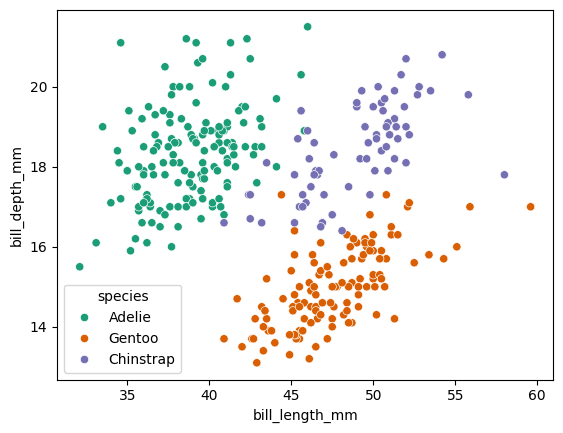

In [116]:
sns.scatterplot(x='bill_length_mm',y='bill_depth_mm',data=df,hue='species',palette='Dark2')

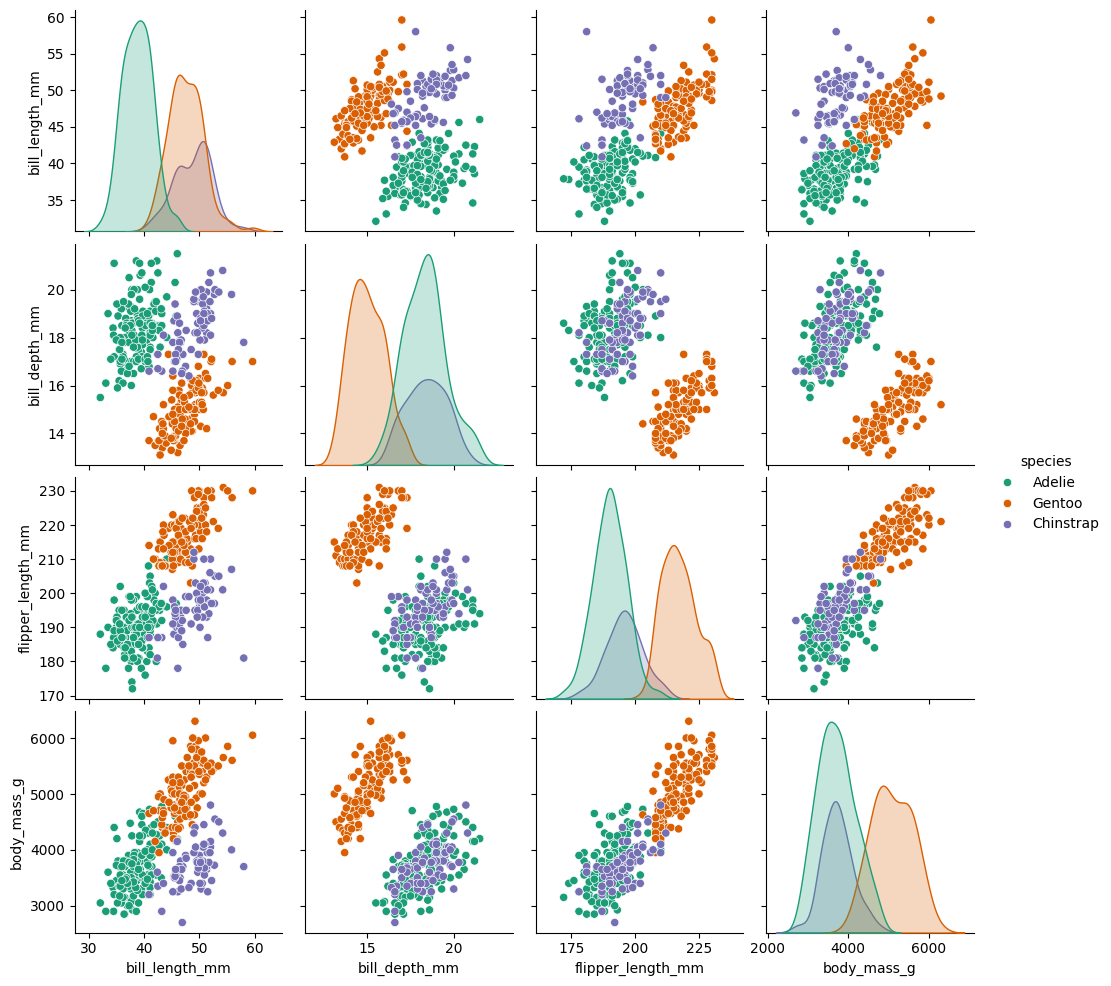

In [117]:
sns.pairplot(df,hue='species',palette='Dark2')

C:\Users\animesh.padhy\AppData\Local\Temp\ipykernel_18920\1420056819.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='species',y='bill_length_mm',data=df,kind='box',col='sex',palette='Dark2')


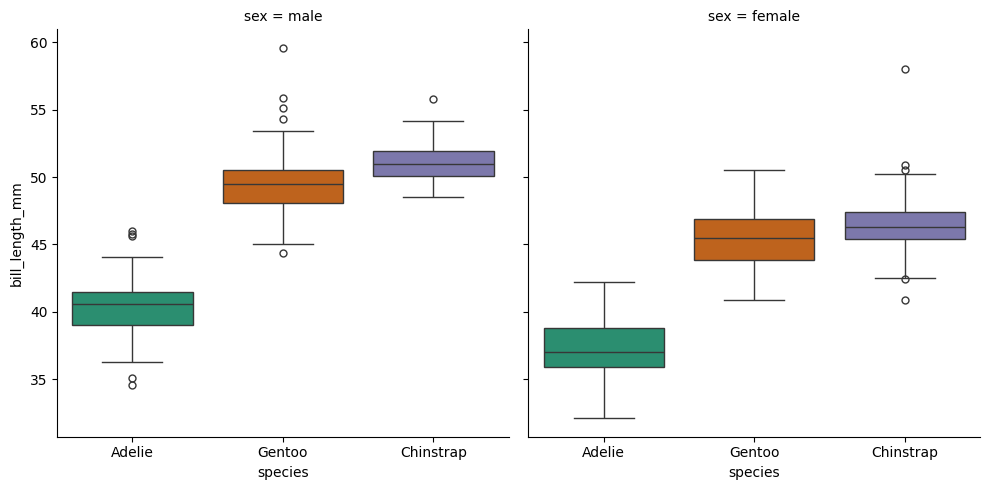

In [118]:
sns.catplot(x='species',y='bill_length_mm',data=df,kind='box',col='sex',palette='Dark2')

## Feature Engineering

In [119]:
pd.get_dummies(df)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,True,False,False,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,True,False,False,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,False,True,False,False,True,False,False,True
340,43.5,18.1,202.0,3400.0,False,True,False,False,True,False,True,False
341,49.6,18.2,193.0,3775.0,False,True,False,False,True,False,False,True
342,50.8,19.0,210.0,4100.0,False,True,False,False,True,False,False,True


In [120]:
pd.get_dummies(df.drop('species',axis=1),drop_first=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181.0,3750.0,False,True,True
1,39.5,17.4,186.0,3800.0,False,True,False
2,40.3,18.0,195.0,3250.0,False,True,False
4,36.7,19.3,193.0,3450.0,False,True,False
5,39.3,20.6,190.0,3650.0,False,True,True
...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,True,False,True
340,43.5,18.1,202.0,3400.0,True,False,False
341,49.6,18.2,193.0,3775.0,True,False,True
342,50.8,19.0,210.0,4100.0,True,False,True


## Train | Test Split

In [121]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Decision Tree Classifier

## Default Hyperparameters

In [124]:
from sklearn.tree import DecisionTreeClassifier

In [125]:
model = DecisionTreeClassifier()

In [126]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [127]:
base_pred = model.predict(X_test)

## Evaluation

In [128]:
from sklearn.metrics import confusion_matrix,classification_report

In [129]:
confusion_matrix(y_test,base_pred)

array([[37,  3,  0],
       [ 1, 18,  0],
       [ 0,  0, 41]], dtype=int64)

In [130]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

      Adelie       0.97      0.93      0.95        40
   Chinstrap       0.86      0.95      0.90        19
      Gentoo       1.00      1.00      1.00        41

    accuracy                           0.96       100
   macro avg       0.94      0.96      0.95       100
weighted avg       0.96      0.96      0.96       100



In [131]:
model.feature_importances_

array([0.38356002, 0.0648245 , 0.5008285 , 0.        , 0.05078698,
       0.        , 0.        ])

In [132]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
bill_length_mm,0.383560
bill_depth_mm,0.064825
flipper_length_mm,0.500828
body_mass_g,0.000000
island_Dream,0.050787
island_Torgersen,0.000000
sex_male,0.000000


<Axes: xlabel='species', ylabel='body_mass_g'>

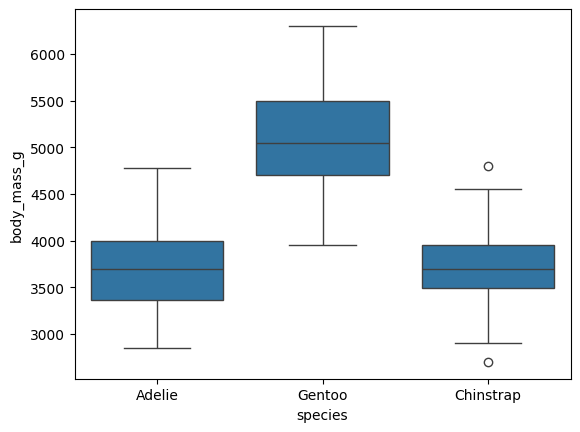

In [133]:
sns.boxplot(x='species',y='body_mass_g',data=df)

## Visualize the Tree

This function is fairly new, you may want to review the online docs:

Online Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

In [134]:
from sklearn.tree import plot_tree

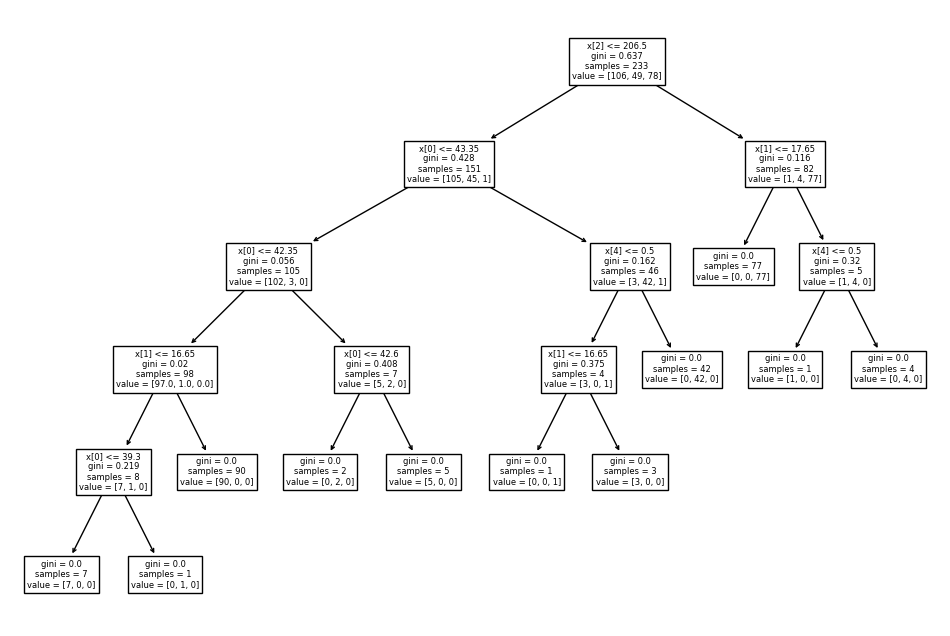

In [135]:
plt.figure(figsize=(12,8))
plot_tree(model);

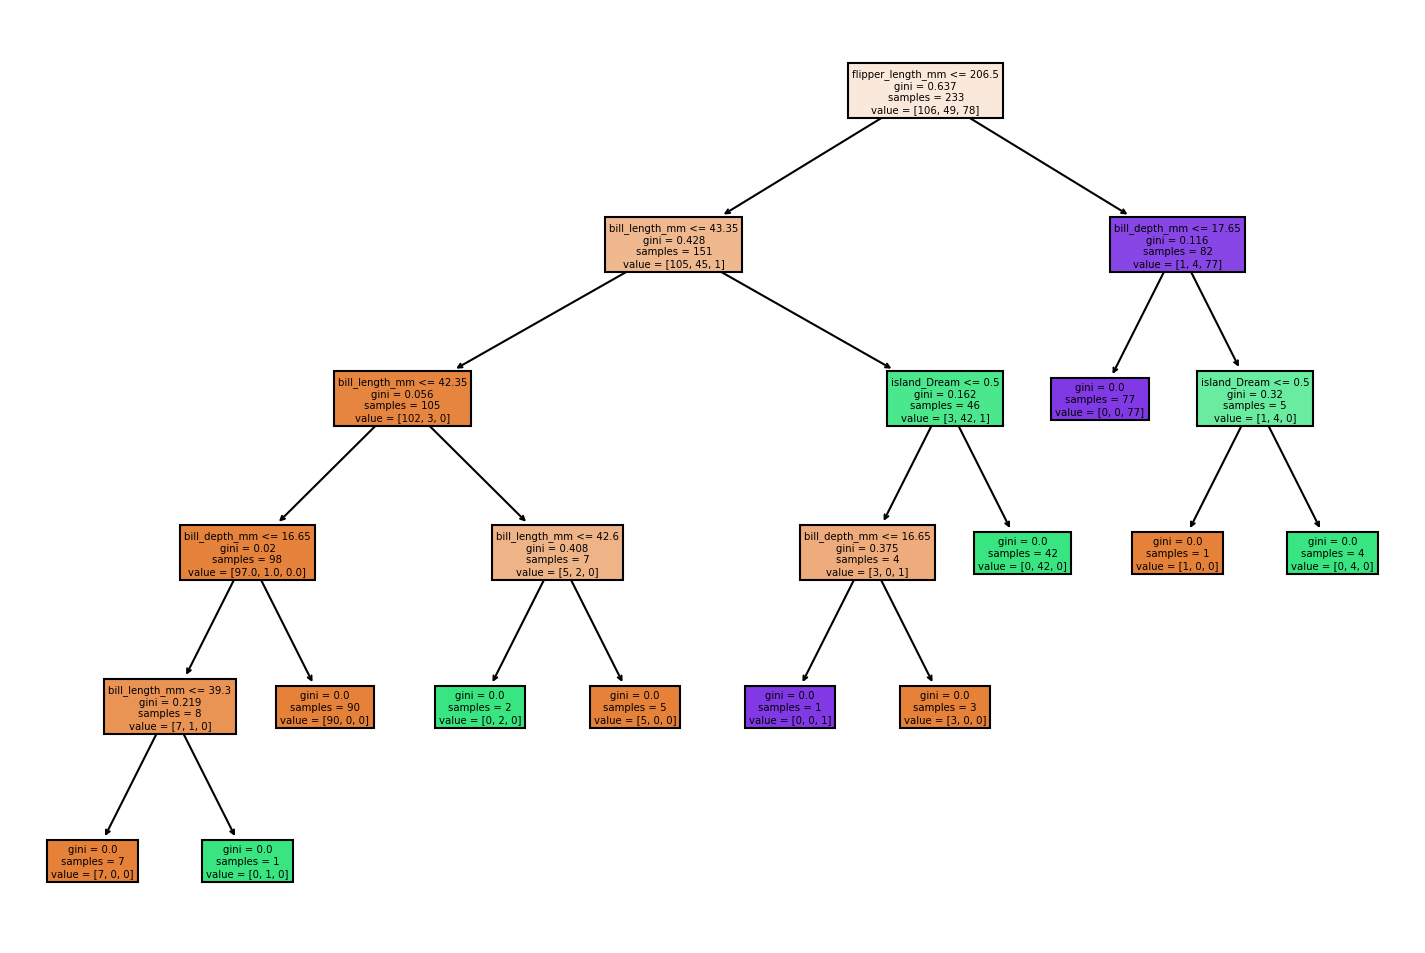

In [136]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled=True,feature_names=X.columns);

## Reporting Model Results

To begin experimenting with hyperparameters, let's create a function that reports back classification results and plots out the tree.

In [137]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

## Understanding Hyperparameters

### Max Depth

In [138]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strat

In [139]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        40
   Chinstrap       0.89      0.89      0.89        19
      Gentoo       1.00      1.00      1.00        41

    accuracy                           0.96       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.96      0.96      0.96       100





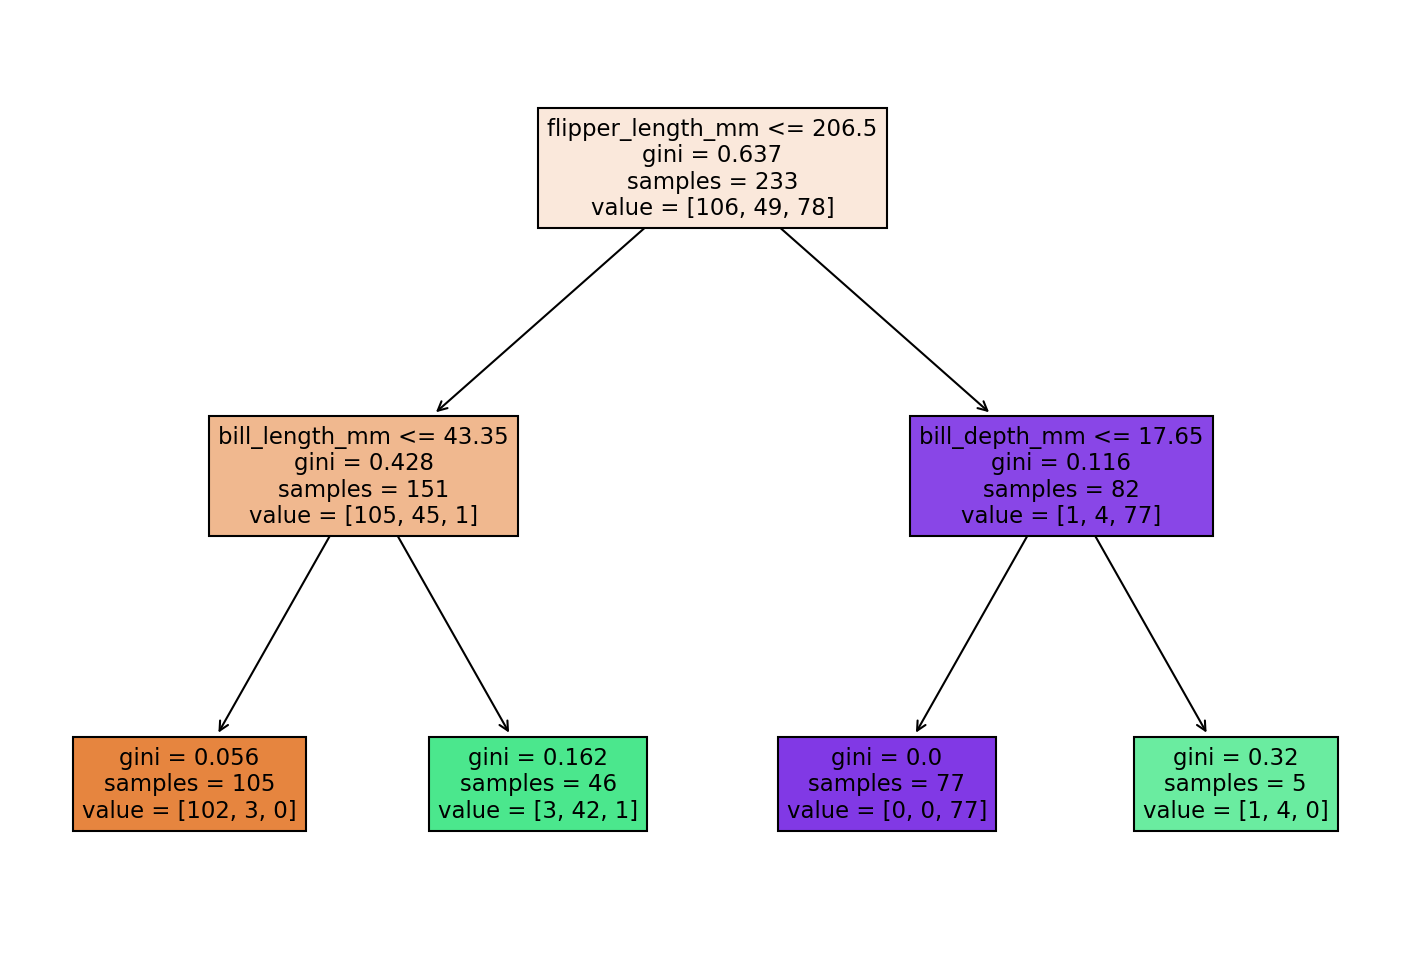

In [140]:
report_model(pruned_tree)

## Max Leaf Nodes

In [141]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        40
   Chinstrap       0.94      0.84      0.89        19
      Gentoo       0.95      1.00      0.98        41

    accuracy                           0.95       100
   macro avg       0.95      0.93      0.94       100
weighted avg       0.95      0.95      0.95       100





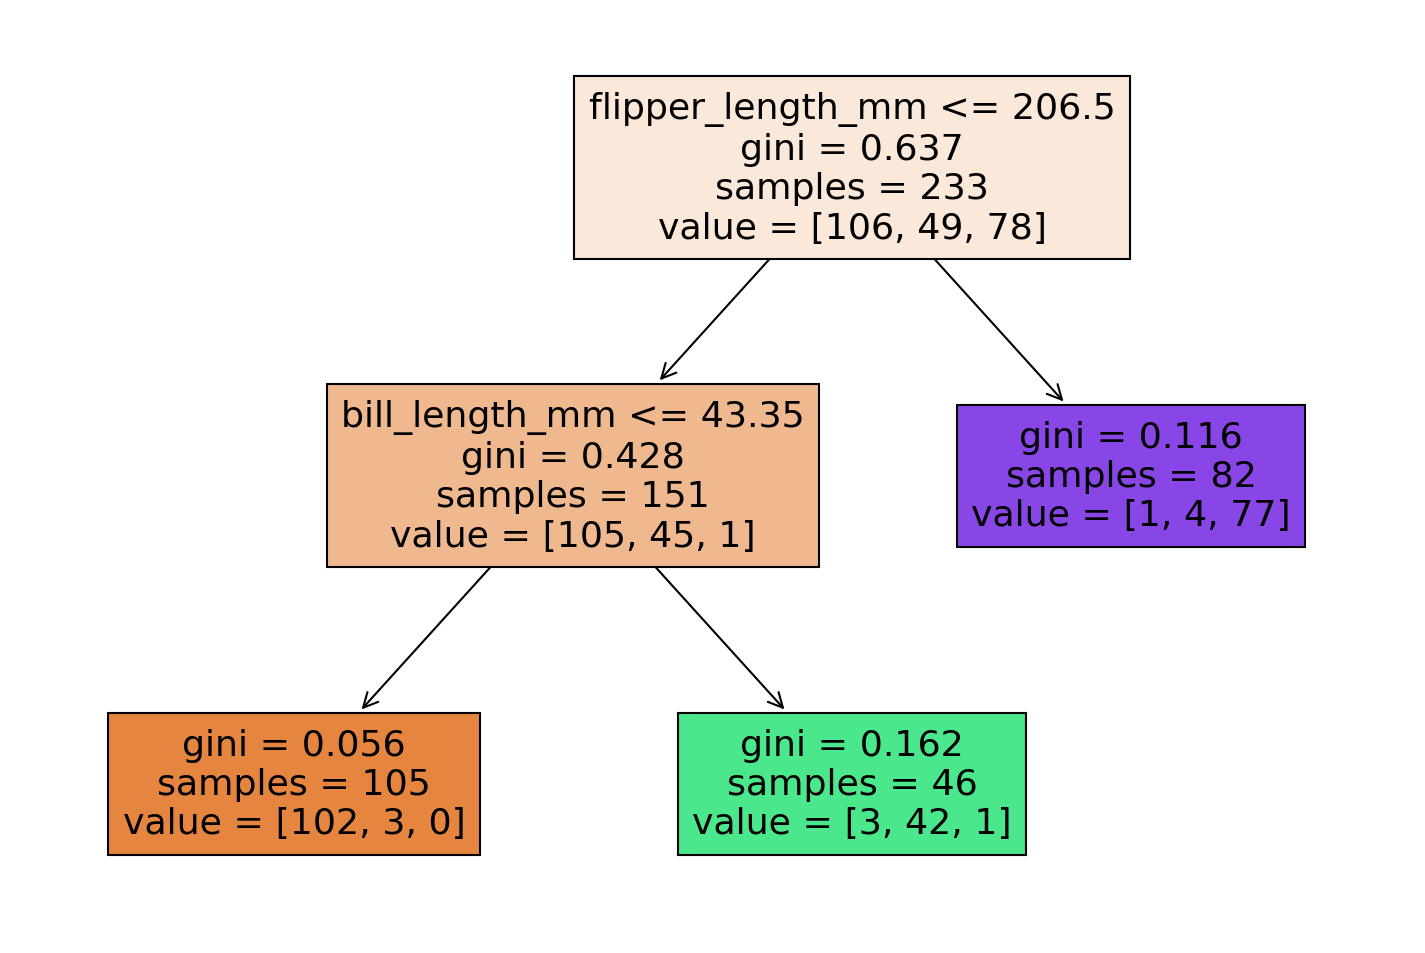

In [142]:
report_model(pruned_tree)

## Criterion

In [143]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       1.00      0.95      0.97        40
   Chinstrap       0.90      1.00      0.95        19
      Gentoo       1.00      1.00      1.00        41

    accuracy                           0.98       100
   macro avg       0.97      0.98      0.97       100
weighted avg       0.98      0.98      0.98       100





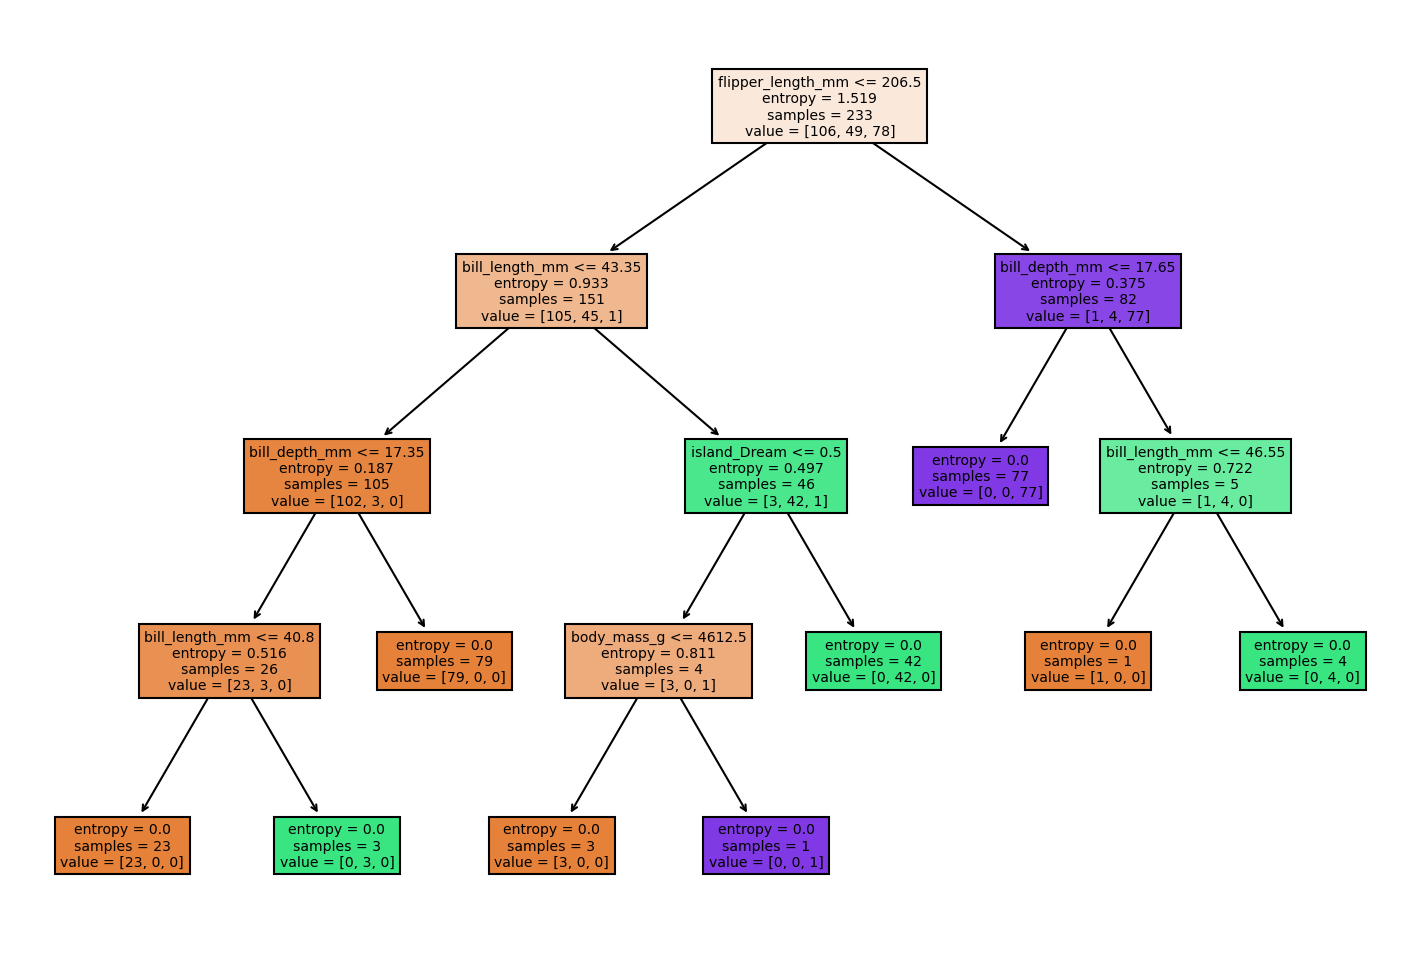

In [144]:
report_model(entropy_tree)

---

# Grid Search for Hyperparameter Tuning

In [145]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the hyperparameters grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_leaf_nodes': [None, 5, 10, 20]
}

# Initialize the DecisionTreeClassifier
tree = DecisionTreeClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters found by grid search:", best_params)

# Train the tree on the best hyperparameters
best_tree = DecisionTreeClassifier(**best_params)
best_tree.fit(X_train, y_train)


Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
Best hyperparameters found by grid search: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'log2', 'max_leaf_nodes': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}


C:\Users\animesh.padhy\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
2160 fits failed out of a total of 8640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
857 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\animesh.padhy\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\animesh.padhy\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\animesh.padhy\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='log2',
                       max_leaf_nodes=20, min_samples_split=5)

              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.99        40
   Chinstrap       0.95      1.00      0.97        19
      Gentoo       1.00      1.00      1.00        41

    accuracy                           0.99       100
   macro avg       0.98      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100





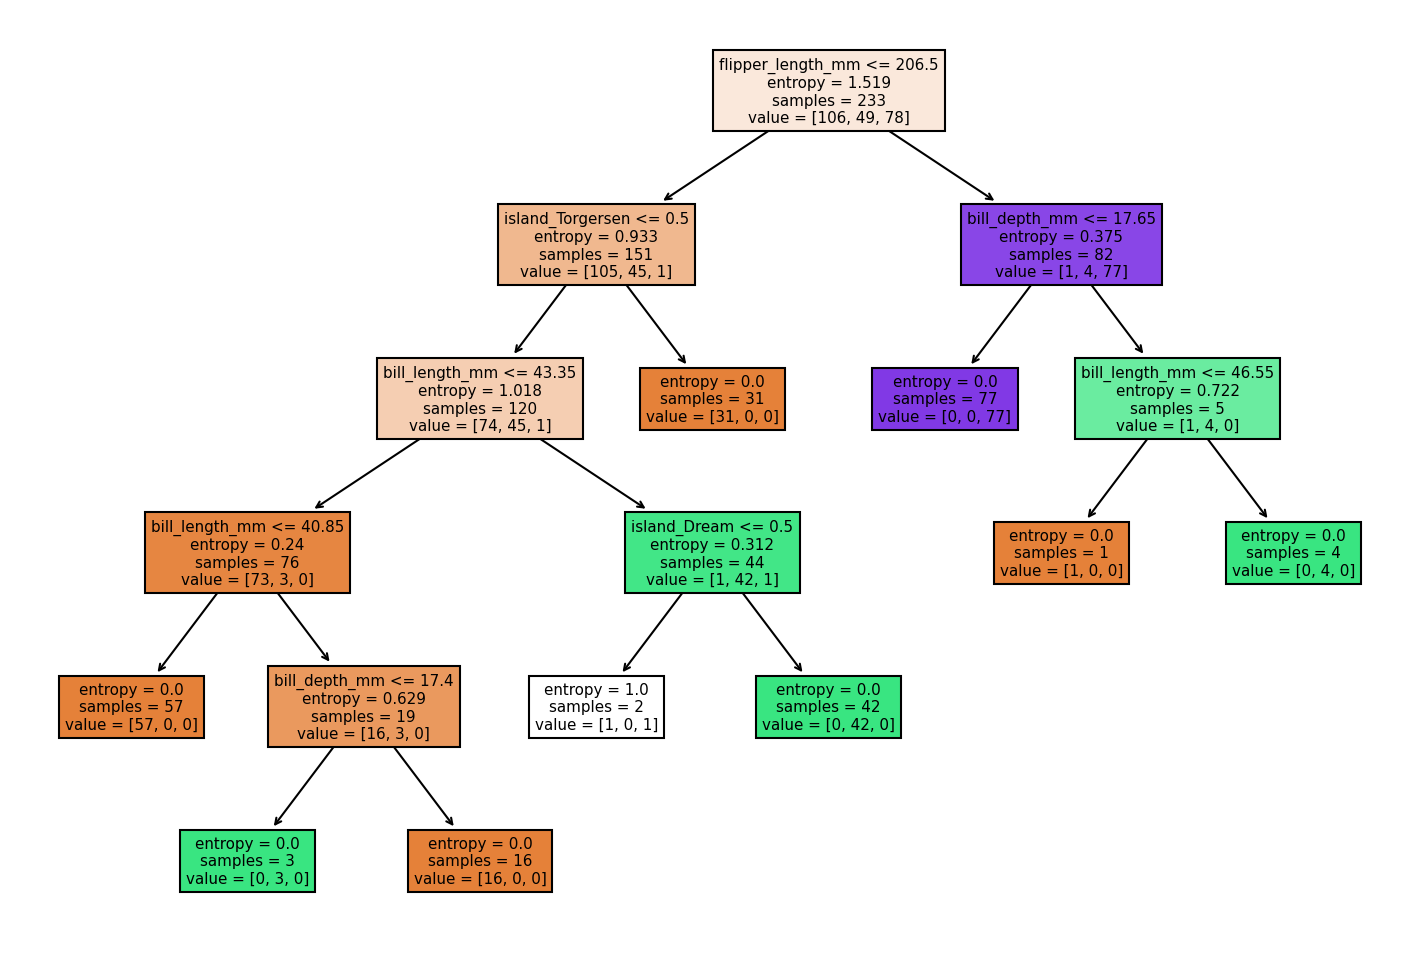

In [146]:
report_model(best_tree)